In [1]:
###

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import gower
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.cluster import DBSCAN
from mlxtend.frequent_patterns import apriori, association_rules
from prince import MCA
from kmodes.kmodes import KModes
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder



In [3]:
url = 'https://raw.githubusercontent.com/leobt23/Statistical_Methods_Data_Mining/main/1_eda/in-vehicle-coupon-recommendation.csv'
data = pd.read_csv(url)

In [133]:
# Display the first few rows of the dataset
data_head = data.head()

# Get the shape of the dataset
data_shape = data.shape

data_head, data_shape


(       destination  passanger weather  temperature  time  \
 0  No Urgent Place      Alone   Sunny           55   2PM   
 1  No Urgent Place  Friend(s)   Sunny           80  10AM   
 2  No Urgent Place  Friend(s)   Sunny           80  10AM   
 3  No Urgent Place  Friend(s)   Sunny           80   2PM   
 4  No Urgent Place  Friend(s)   Sunny           80   2PM   
 
                   coupon expiration  gender age      maritalStatus  ...  \
 0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
 1           Coffee House         2h  Female  21  Unmarried partner  ...   
 2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
 3           Coffee House         2h  Female  21  Unmarried partner  ...   
 4           Coffee House         1d  Female  21  Unmarried partner  ...   
 
    CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
 0        never       NaN                  4~8              1~3   
 1        never       NaN               

In [5]:
data['direction_same'].equals(1 - data['direction_opp'])

True

This tells us that we should drop either one of the columns

In [6]:
data = data.drop('direction_opp', axis=1)

Observe also that toCoupon_GEQ5min is just 1's, so it does not give any information, therefore we drop it 

In [43]:
data = data.drop('toCoupon_GEQ5min', axis=1)

In [4]:
# Basic statistics
data_description = data.describe(include='all')

data_description

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684,...,12467,12533,12554,12495,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,5,2,2,8,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3230,3996,7091,6511,2653,5100,...,3385,4672,5376,6077,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


<Axes: xlabel='Y', ylabel='count'>

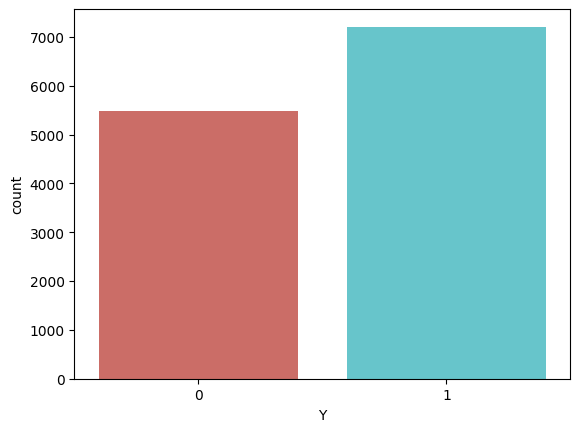

In [5]:
# Balance of the dataset
data['Y'].value_counts()

# graph
sns.countplot(x='Y', data=data, palette='hls')

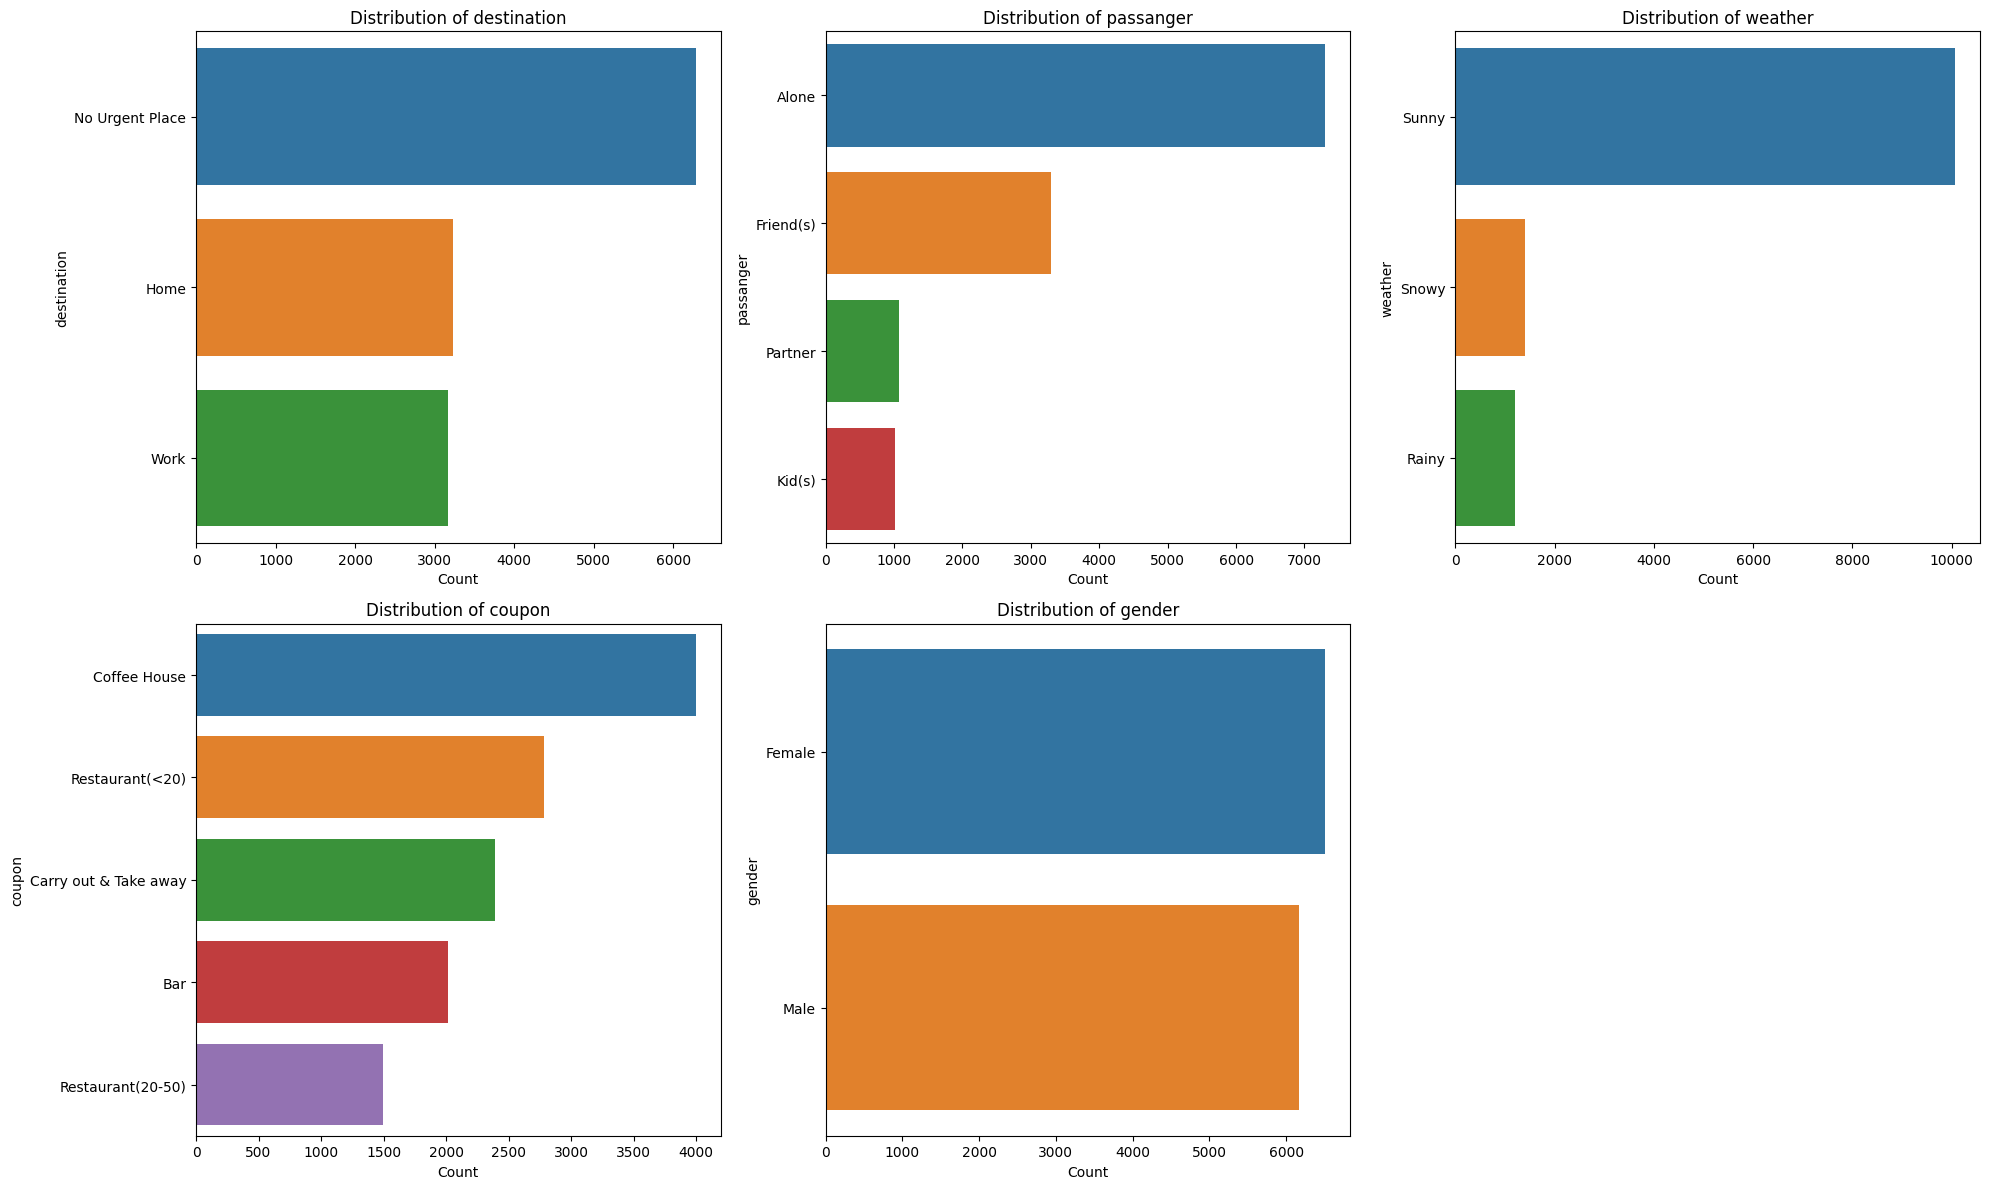

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to visualize
columns_to_visualize = ['destination', 'passanger', 'weather', 'coupon', 'gender']

plt.figure(figsize=(20, 12))

# Plotting the distribution of the selected columns
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=data, y=column, order=data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.tight_layout()

plt.show()


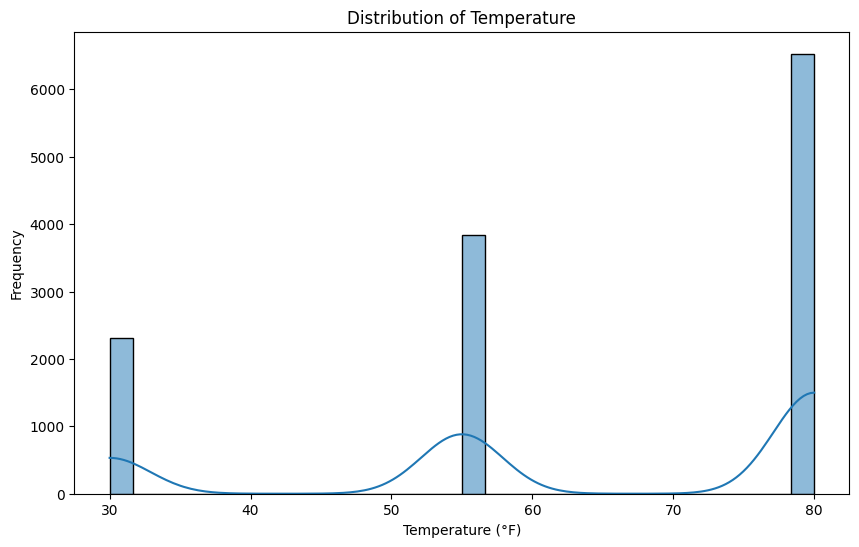

In [7]:
# Visualize the distribution of the 'temperature' column
plt.figure(figsize=(10, 6))
sns.histplot(data['temperature'], kde=True, bins=30)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.show()

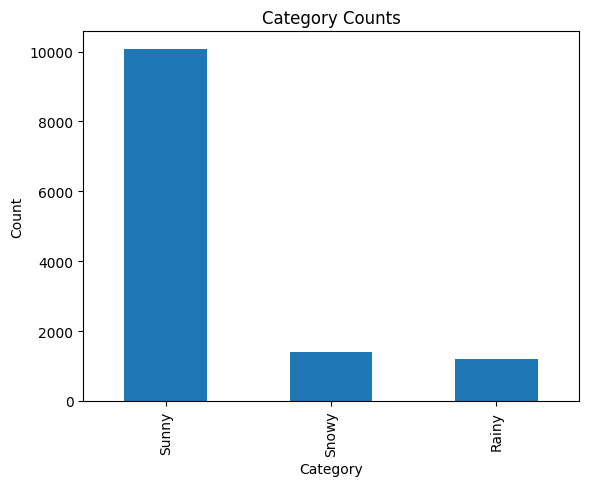

In [10]:
# count the frequency of each category
category_counts = data['weather'].value_counts()

# create a bar plot
category_counts.plot(kind='bar')
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

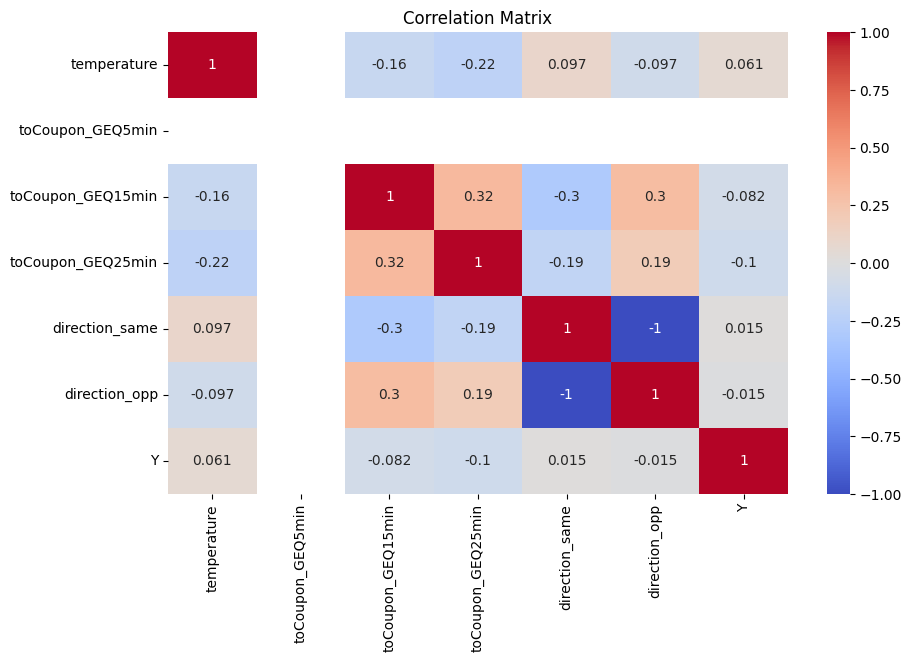

In [8]:
# List of numerical columns for correlation analysis
numerical_columns = ['temperature', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 
                     'direction_same', 'direction_opp', 'Y']

# Compute the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [42]:
data['toCoupon_GEQ5min'].value_counts()

toCoupon_GEQ5min
1    12684
Name: count, dtype: int64

# Case 1: Imputation with the highest count

In [9]:
number_nans_car = data['car'].isna().sum()
number_nans_car/len(data['car'])

0.9914853358561968

As it is clear, the column 'car' has too many missing values, 99%, so we drop this column

In [4]:
data = data.drop('car', axis=1)

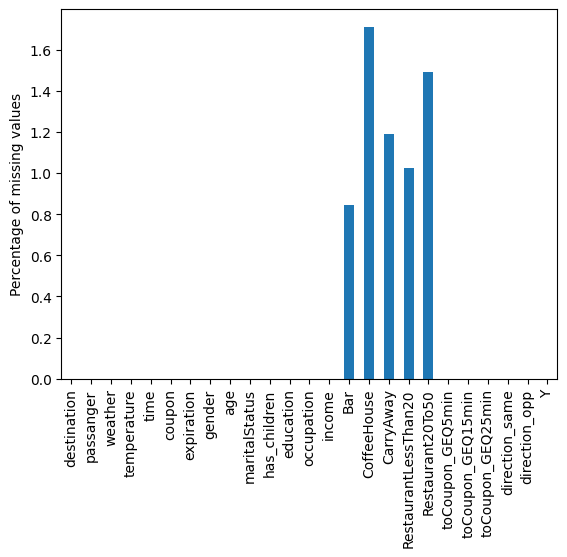

In [135]:
# calculate percentage of missing values for each column
missing_percentages = data.isna().mean() * 100

# create bar plot
missing_percentages.plot(kind='bar')
plt.ylabel('Percentage of missing values')
plt.show()

As can be observed, the percentage of missing values is relatively small, below 1.7%, so we can either drop the rows with missing values or impute them with the most frequent value. We will impute them with the most frequent value.

In [5]:
data = data.fillna(data.mode().iloc[0])

Let us now observe the importance of each feature from the data

In [6]:
X = data.drop("Y", axis=1)
y = data["Y"]

In [7]:
categorical_cols = data.iloc[:, :-1].columns
 
categorical_cols

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp'],
      dtype='object')

In [47]:
data['Y'].value_counts()

Y
1    7210
0    5474
Name: count, dtype: int64

# Chi-Squared test and Cramer-V to check for significant association of each feature

In [48]:
# Dictionary to store p-values for each categorical column
p_values = {}

for col in categorical_cols:
    contingency_table = pd.crosstab(X[col], y)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_values[col] = p

# Filter columns with p-value less than 0.05 (indicating statistical significance)
significant_features = {k: v for k, v in p_values.items() if v < 0.05}

significant_features

{'destination': 8.40265678045787e-48,
 'passanger': 7.284119805592145e-48,
 'weather': 8.312207740720093e-31,
 'temperature': 6.92683621224045e-13,
 'time': 8.37562170116935e-37,
 'coupon': 8.575341747082738e-188,
 'expiration': 2.2875426931245946e-48,
 'gender': 8.05552865589407e-07,
 'age': 3.5221422366296096e-11,
 'maritalStatus': 6.489647983232487e-10,
 'has_children': 3.1775773676508616e-07,
 'education': 6.858463266342188e-08,
 'occupation': 1.0136827151270322e-14,
 'income': 4.30446851198096e-08,
 'Bar': 3.133234600310471e-16,
 'CoffeeHouse': 4.171544970829023e-59,
 'CarryAway': 6.808987792859354e-09,
 'RestaurantLessThan20': 0.00010979372427199479,
 'Restaurant20To50': 9.005798285828938e-14,
 'toCoupon_GEQ15min': 4.6359722947672643e-20,
 'toCoupon_GEQ25min': 2.4662838393790205e-31}

Note that all p-values are smaller than 0.5, so we can conclude that all features are important for the model.

In [49]:
def cramers_v(contingency_table):
    """Compute Cramér's V statistic for categorial-categorial association."""
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Compute Cramér's V for each categorical column
cramers_v_values = {}

for col in categorical_cols:
    contingency_table = pd.crosstab(X[col], y)
    cramers_v_values[col] = cramers_v(contingency_table)

cramers_v_values

{'destination': 0.13013585193341767,
 'passanger': 0.13141577375693062,
 'weather': 0.10375154412652256,
 'temperature': 0.06524853999499858,
 'time': 0.1161511722529424,
 'coupon': 0.2618533514090713,
 'expiration': 0.12946080162032195,
 'gender': 0.04290232331955061,
 'age': 0.06654195881504893,
 'maritalStatus': 0.05941956944275462,
 'has_children': 0.04452043382204428,
 'education': 0.05377271594339019,
 'occupation': 0.08695185860523497,
 'income': 0.05746494618027298,
 'Bar': 0.07679407749884606,
 'CoffeeHouse': 0.1471795056386095,
 'CarryAway': 0.05607134847127839,
 'RestaurantLessThan20': 0.039018952693059376,
 'Restaurant20To50': 0.07057002927387883,
 'toCoupon_GEQ15min': 0.08095883178788449,
 'toCoupon_GEQ25min': 0.10300964398120918,
 'direction_same': 0.01130698097157071}

From the above, it's clear that the coupon feature has the strongest association with the target variable, implying its significant influence on whether a customer accepts a recommendation or not. Most of the other variables have a moderate or weak association with the target.

# Lets look for rules in the data

In [17]:
# One-hot encode your data
one_hot_encoded_data = pd.get_dummies(data[categorical_cols], drop_first=True)

# Find frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(one_hot_encoded_data, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [18]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(destination_No Urgent Place),(passanger_Friend(s)),0.495348,0.260013,0.260013,0.524908,2.018781,0.131216,1.557568,1.000000
1,(passanger_Friend(s)),(destination_No Urgent Place),0.260013,0.495348,0.260013,1.000000,2.018781,0.131216,inf,0.681973
2,(passanger_Kid(s)),(destination_No Urgent Place),0.079313,0.495348,0.068590,0.864811,1.745864,0.029303,3.732937,0.464020
3,(destination_No Urgent Place),(passanger_Kid(s)),0.495348,0.079313,0.068590,0.138469,1.745864,0.029303,1.068664,0.846560
4,(destination_No Urgent Place),(passanger_Partner),0.495348,0.084752,0.064333,0.129874,1.532396,0.022351,1.051857,0.688449
...,...,...,...,...,...,...,...,...,...,...
5077,(Restaurant20To50_less1),"(destination_No Urgent Place, weather_Sunny, p...",0.494008,0.113608,0.057080,0.115544,1.017046,0.000957,1.002189,0.033123
5078,(destination_No Urgent Place),"(weather_Sunny, passanger_Friend(s), gender_Ma...",0.495348,0.057080,0.057080,0.115232,2.018781,0.028805,1.065725,1.000000
5079,(passanger_Friend(s)),"(destination_No Urgent Place, weather_Sunny, g...",0.260013,0.099574,0.057080,0.219527,2.204656,0.031189,1.153692,0.738411
5080,(gender_Male),"(destination_No Urgent Place, weather_Sunny, p...",0.486676,0.113135,0.057080,0.117285,1.036685,0.002020,1.004702,0.068936


The support metric gives the proportion of transactions in which the itemset appears. 

The confidence metric measures the likelihood of item Y being bought when item X is bought.

The lift metric measures how much more likely item Y is bought when item X is bought, compared to when item Y is bought randomly.

/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:797: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype_orig is not None and dtype_orig in dtype:
/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:797: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype_orig is not None and dtype_orig in dtype:


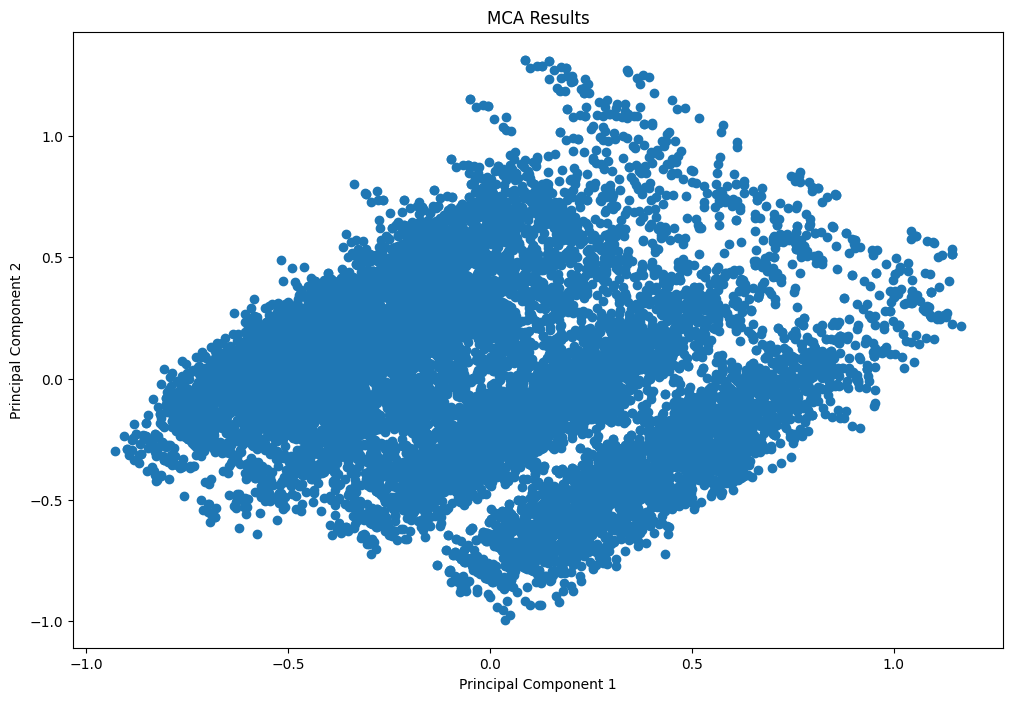

In [22]:
# Initialize MCA
mca = prince.MCA(n_components=2, random_state=42)

# Fit and transform the data
mca_data = mca.fit_transform(data[categorical_cols])

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(mca_data[0], mca_data[1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MCA Results')
plt.show()

Após a projeção a 2 dimensoes os dados aparentar estar distribuidos por 3/4 clusters, pelo que analise-se tal facto.

In [23]:
# For 3 clusters
kmodes_3 = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
clusters_3 = kmodes_3.fit_predict(data[categorical_cols])
data['Cluster_3'] = clusters_3

# For 4 clusters
kmodes_4 = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
clusters_4 = kmodes_4.fit_predict(data[categorical_cols])
data['Cluster_4'] = clusters_4

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3873, cost: 114614.0
Run 1, iteration: 2/100, moves: 3, cost: 114614.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3560, cost: 115718.0
Run 2, iteration: 2/100, moves: 691, cost: 115718.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2932, cost: 114841.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3459, cost: 114405.0
Run 4, iteration: 2/100, moves: 161, cost: 114405.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3536, cost: 113741.0
Run 5, iteration: 2/100, moves: 532, cost: 113741.0
Best run was number 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, mo

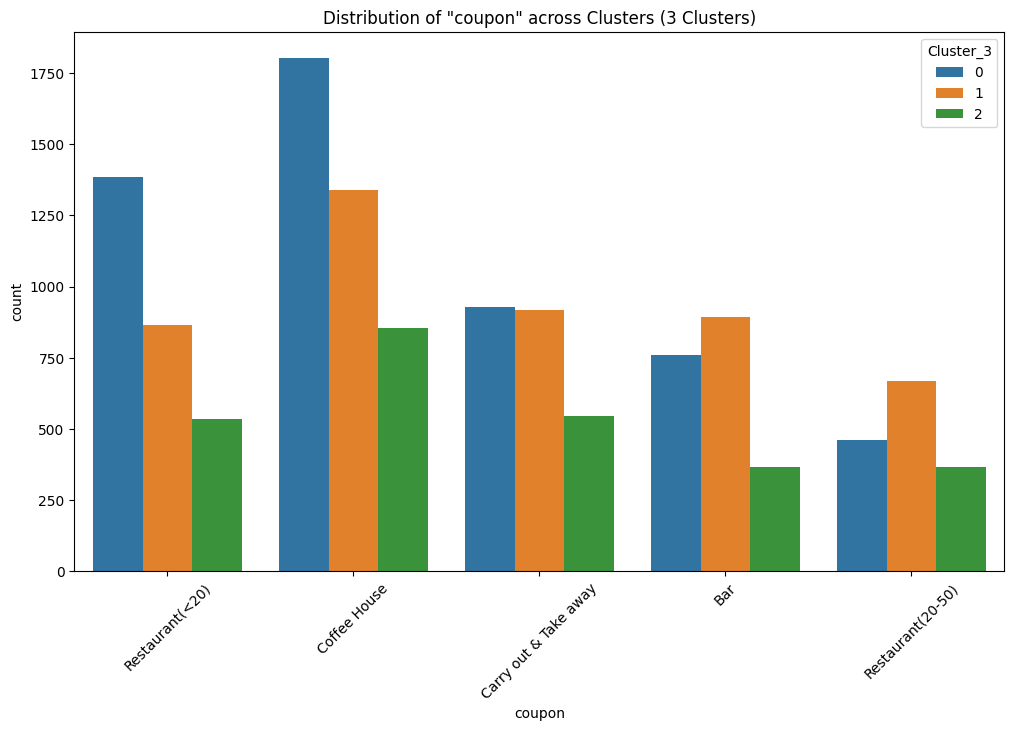

In [27]:
# Assuming 'Cluster_3' is the column with cluster labels when using 3 clusters
plt.figure(figsize=(12, 7))
sns.countplot(data=data, x='coupon', hue='Cluster_3')
plt.title('Distribution of "coupon" across Clusters (3 Clusters)')
plt.xticks(rotation=45)
plt.show()

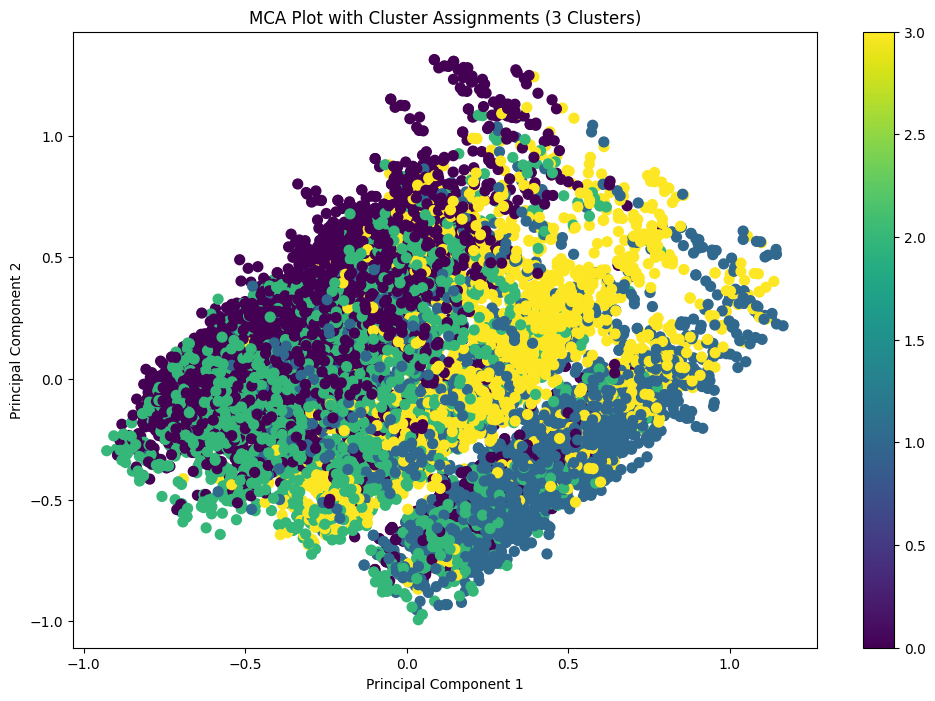

In [30]:
# Assuming mca_data is the DataFrame with the 2D coordinates from MCA
# and clusters_3 is the array of cluster labels when using 3 clusters

plt.figure(figsize=(12, 8))
plt.scatter(mca_data[0], mca_data[1], c=clusters_4, cmap='viridis', s=50)
plt.colorbar()
plt.title('MCA Plot with Cluster Assignments (3 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:797: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype_orig is not None and dtype_orig in dtype:
/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:797: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype_orig is not None and dtype_orig in dtype:


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3553, cost: 118016.0
Run 1, iteration: 2/100, moves: 1345, cost: 118016.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2965, cost: 118783.0
Run 2, iteration: 2/100, moves: 130, cost: 118783.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2618, cost: 118917.0
Run 3, iteration: 2/100, moves: 237, cost: 118917.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2489, cost: 118297.0
Run 4, iteration: 2/100, moves: 1431, cost: 117903.0
Run 4, iteration: 3/100, moves: 149, cost: 117903.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3002, cost: 119201.0
Run 5, iteration: 2/100, moves: 998, cost: 119201.0
Best run was number 4

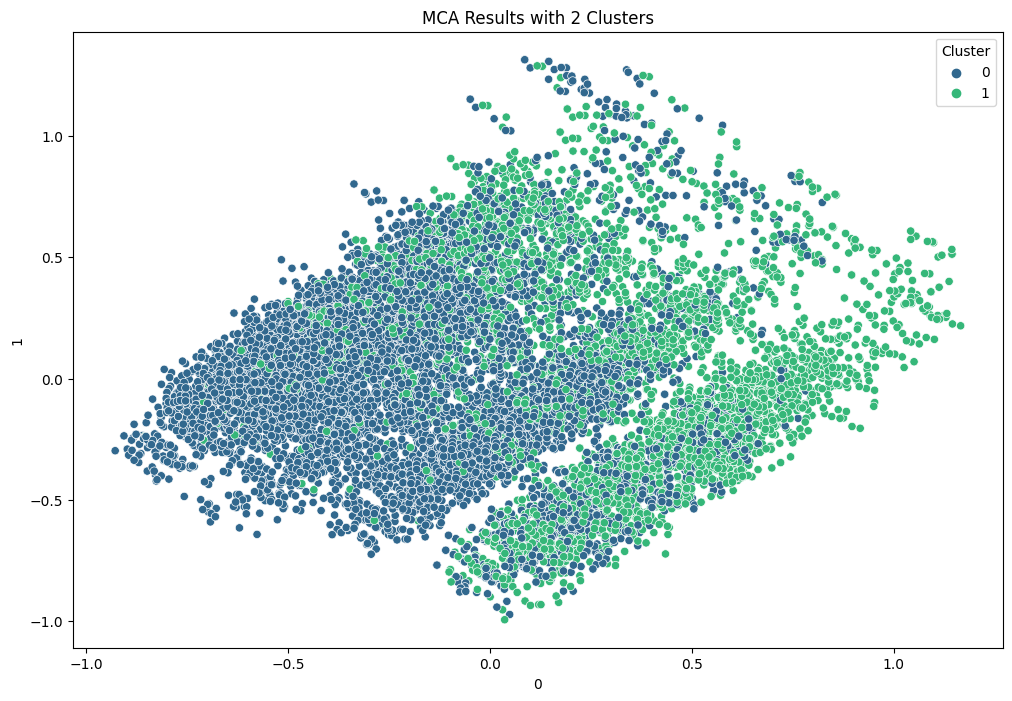

In [32]:
# 1. Perform MCA
mca = prince.MCA(n_components=2, random_state=42)
mca_data = mca.fit_transform(data[categorical_cols])

# 2. Cluster the data (using 2 clusters as an example)
kmodes_2 = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1)
clusters_2 = kmodes_2.fit_predict(data[categorical_cols])

# 3. Add the cluster labels to the MCA transformed data
mca_data['Cluster'] = clusters_2

# 4. Plot the MCA results with cluster labels
plt.figure(figsize=(12, 8))
sns.scatterplot(data=mca_data, x=0, y=1, hue='Cluster', palette='viridis')
plt.title('MCA Results with 2 Clusters')
plt.show()

/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:797: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype_orig is not None and dtype_orig in dtype:
/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:797: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype_orig is not None and dtype_orig in dtype:


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4054, cost: 114025.0
Run 1, iteration: 2/100, moves: 69, cost: 114025.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3310, cost: 114674.0
Run 2, iteration: 2/100, moves: 276, cost: 114674.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3787, cost: 112999.0
Run 3, iteration: 2/100, moves: 396, cost: 112999.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3074, cost: 114739.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 4358, cost: 114630.0
Run 5, iteration: 2/100, moves: 471, cost: 114630.0
Best run was number 3


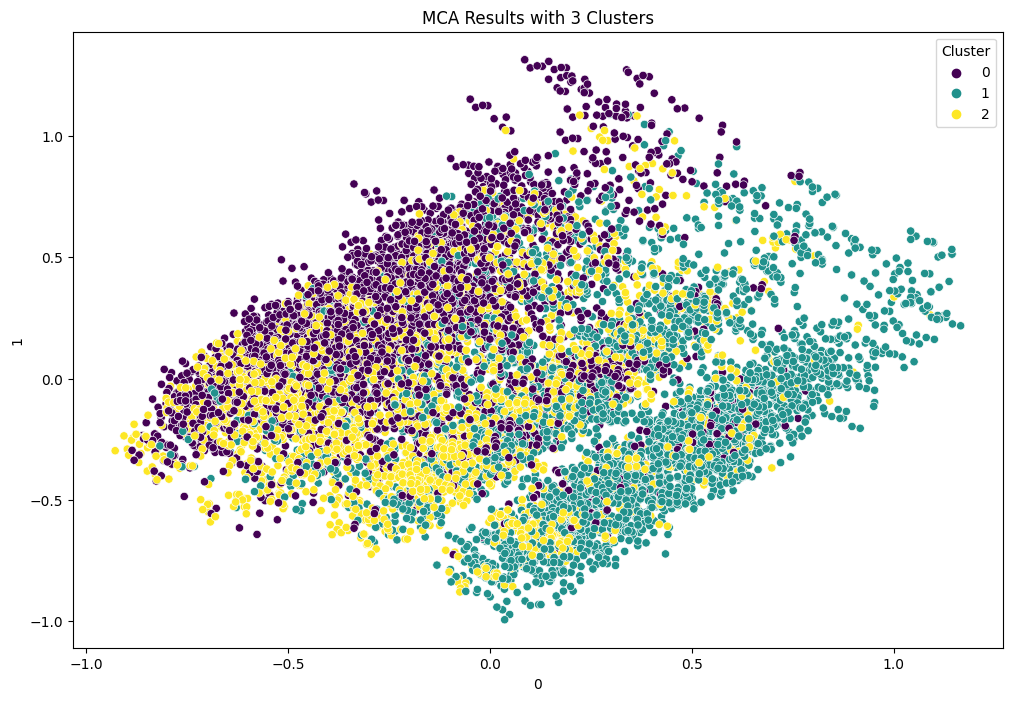

In [31]:
# 1. Perform MCA
mca = prince.MCA(n_components=2, random_state=42)
mca_data = mca.fit_transform(data[categorical_cols])

# 2. Cluster the data (using 3 clusters as an example)
kmodes_3 = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
clusters_3 = kmodes_3.fit_predict(data[categorical_cols])

# 3. Add the cluster labels to the MCA transformed data
mca_data['Cluster'] = clusters_3

# 4. Plot the MCA results with cluster labels
plt.figure(figsize=(12, 8))
sns.scatterplot(data=mca_data, x=0, y=1, hue='Cluster', palette='viridis')
plt.title('MCA Results with 3 Clusters')
plt.show()

Hierarchical clustering with gower distance

In [36]:
distance_matrix = gower.gower_matrix(X)

In [37]:
# The n_clusters parameter can be adjusted later based on the dendrogram
model = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete')
cluster_labels = model.fit_predict(distance_matrix)

/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


/var/folders/1x/bb_t5f9n6lsblyt1gzs4npdh0000gn/T/ipykernel_94405/279504698.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(distance_matrix, 'complete')


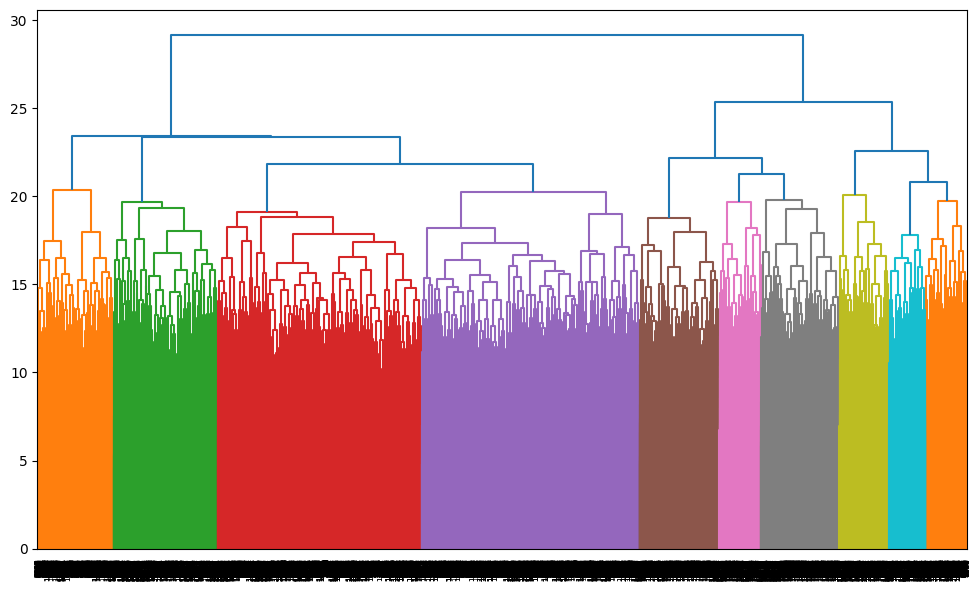

In [39]:
linked = linkage(distance_matrix, 'complete')

plt.figure(figsize=(12, 7))
dendrogram(linked)
plt.show()

Forma fraca de visualizar os clusters dado a quantidade enorme de dados

In [84]:
# Adjust eps and min_samples based on your data's characteristics
dbscan = DBSCAN(metric='precomputed', eps=0.212, min_samples=5)
cluster_labels = dbscan.fit_predict(distance_matrix)

In [85]:
mca_dbscan = prince.MCA(n_components=2)
mca_data_dbscan = mca_dbscan.fit_transform(X)

/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:797: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype_orig is not None and dtype_orig in dtype:
/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:797: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype_orig is not None and dtype_orig in dtype:


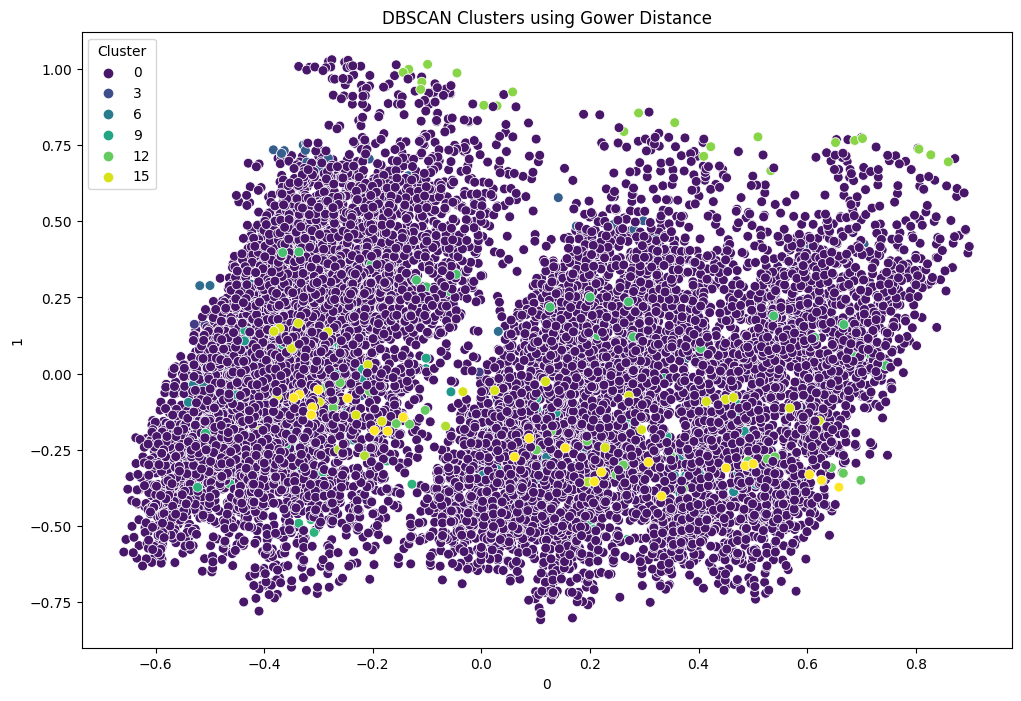

In [86]:
mca_data_dbscan['Cluster'] = cluster_labels

plt.figure(figsize=(12, 8))
sns.scatterplot(data=mca_data_dbscan, x=0, y=1, hue='Cluster', palette='viridis', s=50)
plt.title('DBSCAN Clusters using Gower Distance')
plt.show()

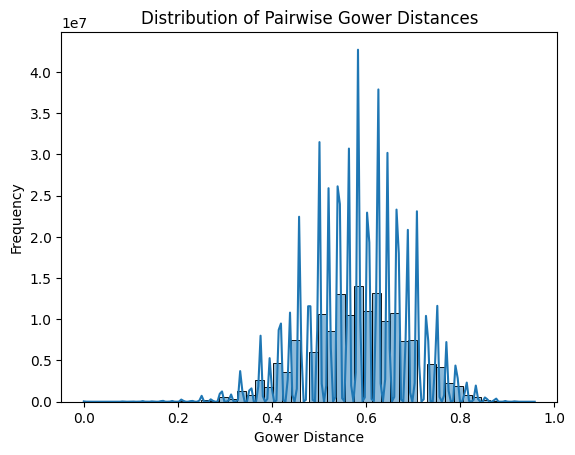

In [62]:
sns.histplot(distance_matrix.flatten(), bins=50, kde=True)
plt.xlabel("Gower Distance")
plt.ylabel("Frequency")
plt.title("Distribution of Pairwise Gower Distances")
plt.show()

In [58]:
mca_data_dbscan

,0,1,Cluster
0,-0.194952,0.178587,0
1,-0.389844,0.282186,0
2,-0.383013,0.226286,0
3,-0.444663,0.266462,0
4,-0.424658,0.263872,0
...,...,...,...
12679,0.490372,0.087736,0
12680,0.350884,0.087898,0
12681,0.701477,0.005594,0
12682,0.374605,-0.023567,0


In [59]:
cluster_distribution = pd.Series(cluster_labels).value_counts()
print(cluster_distribution)

0    12684
Name: count, dtype: int64


In [49]:
unique_labels = pd.Series(cluster_labels).unique()

In [44]:
data['Cluster'] = cluster_labels
cluster_profiles = data.groupby('Cluster').agg(lambda x: x.value_counts().index[0])
print(cluster_profiles)

             destination passanger weather  temperature time        coupon  \
Cluster                                                                      
0        No Urgent Place     Alone   Sunny           80  6PM  Coffee House   

        expiration  gender age    maritalStatus  ...  RestaurantLessThan20  \
Cluster                                          ...                         
0               1d  Female  21  Married partner  ...                   1~3   

        Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min  \
Cluster                                                                         
0                  less1                1                 1                 0   

        direction_same direction_opp  Y Cluster_3  Cluster_4  
Cluster                                                       
0                    0             1  1         0          0  

[1 rows x 27 columns]


Now lets do some interaction analysis

In [87]:
data['coupon_weather_interaction'] = data['coupon'] + "_" + data['weather']

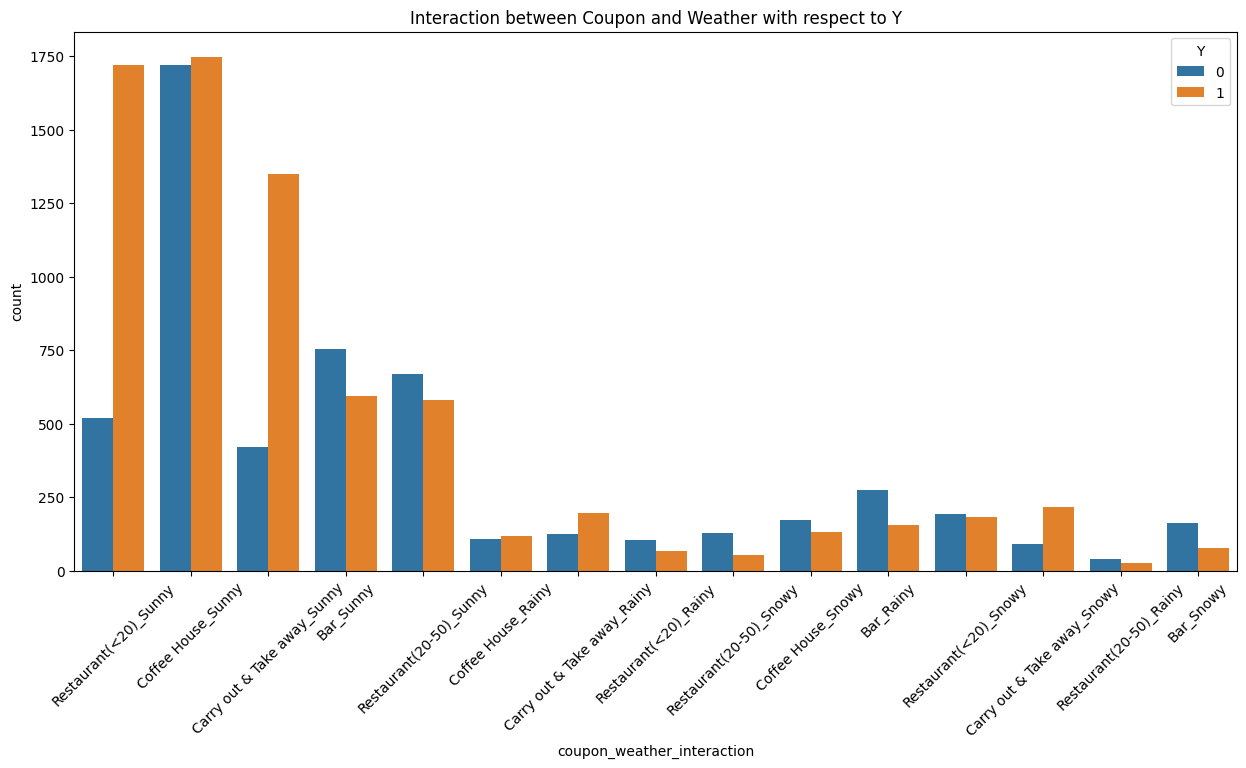

In [88]:
plt.figure(figsize=(15, 7))
sns.countplot(data=data, x='coupon_weather_interaction', hue='Y')
plt.xticks(rotation=45)
plt.title('Interaction between Coupon and Weather with respect to Y')
plt.show()

Clear influence of Restaurant(<20) and Sunny and also on Coffee_House and Sunny on whether to accept the cuppon or not

In [89]:
contingency_table = pd.crosstab(data['coupon_weather_interaction'], data['Y'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Chi-squared value: 1121.2835592029592
P-value: 1.4315729667231356e-230


In [108]:
data_copy = data.copy()

Lets do the same for the rest of the variables

In [109]:
# Create a dictionary to store interaction dataframes
interaction_dataframes = {}

# Loop through pairs of categorical columns to create interaction terms
for i, col1 in enumerate(categorical_cols):
    for j, col2 in enumerate(categorical_cols):
        if i < j:  # To ensure unique pairs and avoid self-interaction
            interaction_col_name = col1 + "_" + col2
            interaction_dataframes[interaction_col_name] = data_copy[col1] + "_" + data_copy[col2]

# Concatenate all interaction columns to the original dataframe
data_copy = pd.concat([data_copy, pd.DataFrame(interaction_dataframes)], axis=1)

# Now you can proceed with visualization and statistical testing as before

In [111]:
for interaction in interaction_terms:
    # Visualization
    #plt.figure(figsize=(15, 7))
    #sns.countplot(data=data_copy, x=interaction, hue='Y')
    #plt.xticks(rotation=45)
    #plt.title(f'Interaction between {interaction} with respect to Y')
    #plt.show()
    
    # Statistical Testing
    contingency_table = pd.crosstab(data_copy[interaction], data['Y'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Interaction: {interaction}")
    print(f"Chi-squared value: {chi2}")
    print(f"P-value: {p}")
    print("\n" + "-"*50 + "\n")

Interaction: destination_passanger
Chi-squared value: 297.6379509782442
P-value: 1.93249041721453e-60

--------------------------------------------------

Interaction: destination_weather
Chi-squared value: 367.0780648288264
P-value: 2.042503788660866e-74

--------------------------------------------------

Interaction: destination_time
Chi-squared value: 272.03091642164776
P-value: 7.975709326069122e-56

--------------------------------------------------

Interaction: destination_coupon
Chi-squared value: 1196.7550565798558
P-value: 8.646290541349942e-247

--------------------------------------------------

Interaction: destination_expiration
Chi-squared value: 499.40197332912857
P-value: 1.074830096290122e-105

--------------------------------------------------

Interaction: destination_gender
Chi-squared value: 244.85901621687592
P-value: 6.966957566383699e-51

--------------------------------------------------

Interaction: destination_age
Chi-squared value: 302.8589094039171
P-val

In [92]:
data.shape

(12684, 165)

# Outliers e Fit distr.

### Outliers - Categorical (Complicado ?)


In [11]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,1,0,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,1,0,0,0


# Classification

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
from sklearn.model_selection import RandomizedSearchCV

### Holdout method

### KNN with MCA projection

In [12]:
mca_80 = MCA(n_components=2)  # You can adjust the number of components if needed
mca_80 = mca_80.fit(X_train_80)

X_train_mca_80 = mca_80.transform(X_train_80)
X_test_mca_80 = mca_80.transform(X_test_80)

/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:797: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype_orig is not None and dtype_orig in dtype:
/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:797: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype_orig is not None and dtype_orig in dtype:
/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:797: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype_orig is not None and dtype_orig in dtype:


In [ ]:
mca_70 = MCA(n_components=2)  # You can adjust the number of components if needed
mca_70 = mca_70.fit(X_train_70)

X_train_mca_70 = mca_70.transform(X_train_70)
X_test_mca_70 = mca_70.transform(X_test_70)

In [67]:
knn = KNeighborsClassifier(n_neighbors=11, weights = 'uniform', p = 2 )  # Adjust the number of neighbors if needed
knn.fit(X_train_mca, y_train)

y_pred_knn = knn.predict(X_test_mca)
print("KNN Classification Report on MCA Projected Data:")
print(classification_report(y_test, y_pred_knn))

KNN Classification Report on MCA Projected Data:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43      1128
           1       0.58      0.69      0.63      1409

    accuracy                           0.55      2537
   macro avg       0.54      0.54      0.53      2537
weighted avg       0.54      0.55      0.54      2537



Hyper parameter tuning

In [66]:
# Define parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan, 2: Euclidean
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_mca, y_train)  # or use Gower's distance transformed data

print("Best KNN Parameters:", grid_search_knn.best_params_)

Best KNN Parameters: {'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}


### KNN with Gowers distance

In [53]:
# Compute Gower distance matrix
gower_distance_matrix = gower.gower_matrix(X_train)

# KNN with precomputed distance matrix
knn = KNeighborsClassifier(n_neighbors=5, metric='precomputed') 
knn.fit(gower_distance_matrix, y_train)

# Predict on the test set
gower_distance_test = gower.gower_matrix(X_test, X_train)
y_pred_knn = knn.predict(gower_distance_test)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.57      0.61      1128
           1       0.69      0.75      0.71      1409

    accuracy                           0.67      2537
   macro avg       0.66      0.66      0.66      2537
weighted avg       0.67      0.67      0.67      2537



### Naive bayes categorical

To apply such we need do to some label enconding

In [54]:
# Create a dictionary to store label encoders for each column
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Use the encoder from the training set
    label_encoders[col] = le

In [69]:
cnb = CategoricalNB(alpha=1)
cnb.fit(X_train, y_train)
y_pred_cnb = cnb.predict(X_test)

print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_cnb))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.55      0.59      1128
           1       0.67      0.74      0.71      1409

    accuracy                           0.66      2537
   macro avg       0.65      0.64      0.65      2537
weighted avg       0.65      0.66      0.65      2537



Hyperparameter tuning

In [68]:
param_grid_cnb = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

cnb = CategoricalNB()
grid_search_cnb = GridSearchCV(cnb, param_grid_cnb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_cnb.fit(X_train, y_train)

print("Best CategoricalNB Parameters:", grid_search_cnb.best_params_)

Best CategoricalNB Parameters: {'alpha': 1}


### Random Forest Classifier

In [72]:
# Label encoding for Random Forest
X_rf = X.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_rf[col] = le.fit_transform(X_rf[col])
    label_encoders[col] = le

# Splitting the data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y, test_size=0.2, random_state=42)

# Random Forest Classification
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth = 30, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 5, random_state=42)
rf_classifier.fit(X_train_rf, y_train_rf)
y_pred_rf = rf_classifier.predict(X_test_rf)

print("Random Forest Classification Report:")
print(classification_report(y_test_rf, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.64      0.69      1128
           1       0.74      0.83      0.79      1409

    accuracy                           0.75      2537
   macro avg       0.75      0.74      0.74      2537
weighted avg       0.75      0.75      0.74      2537



Hyperparameter tuning

In [71]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']  # removed 'auto' from here
}

rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best RandomForest Parameters:", grid_search_rf.best_params_)

Best RandomForest Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


### Catboost Classifier

In [16]:
cat_features_indices = [X.columns.get_loc(col) for col in categorical_cols]

catboost_classifier = CatBoostClassifier(iterations=1000, learning_rate = 0.1, l2_leaf_reg = 3 ,depth=8, cat_features=cat_features_indices, verbose=0)
catboost_classifier.fit(X_train, y_train)
y_pred_catboost = catboost_classifier.predict(X_test)

print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_catboost))

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1128
           1       0.77      0.83      0.80      1409

    accuracy                           0.76      2537
   macro avg       0.76      0.76      0.76      2537
weighted avg       0.76      0.76      0.76      2537



Hyper parameter tuning

In [75]:
param_grid_catboost = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'iterations': [200, 500, 1000],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

random_search_catboost = RandomizedSearchCV(CatBoostClassifier(cat_features=cat_features_indices, verbose=0), 
                                            param_grid_catboost, n_iter=20, cv=3, n_jobs=-1)
random_search_catboost.fit(X_train, y_train)

print("Best CatBoost Hyperparameters:", random_search_catboost.best_params_)

Best CatBoost Hyperparameters: {'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 1000, 'depth': 8}


### Logistic Regression

In [81]:
# One-hot encoding the data for Logistic Regression
encoder = OneHotEncoder(drop='first')
X_encoded = encoder.fit_transform(X)

# Splitting the encoded data
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, C = 0.1, penalty = 'l1', solver = 'liblinear')
log_reg.fit(X_train_encoded, y_train_encoded)
y_pred_log_reg = log_reg.predict(X_test_encoded)

print("Logistic Regression Classification Report:")
print(classification_report(y_test_encoded, y_pred_log_reg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.56      0.61      1649
           1       0.70      0.79      0.74      2157

    accuracy                           0.69      3806
   macro avg       0.69      0.68      0.68      3806
weighted avg       0.69      0.69      0.69      3806



In [79]:
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],  # 'liblinear' for l1 and l2, 'saga' for elasticnet
    'l1_ratio': [0.1, 0.5, 0.9]  # Only relevant for elasticnet
}


grid_search_logreg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_logreg, cv=5, n_jobs=-1)
grid_search_logreg.fit(X_train_encoded, y_train_encoded)

print("Best Logistic Regression Hyperparameters:", grid_search_logreg.best_params_)

Best Logistic Regression Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
240 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/lin

In [38]:
def preprocess_mca(X_train, X_test, y_train):
    mca = MCA(n_components=2)
    mca.fit(X_train)
    return mca.transform(X_train), mca.transform(X_test)

def preprocess_gower(X_train, X_test, y_train):
    return gower.gower_matrix(X_train), gower.gower_matrix(X_test, X_train)

def preprocess_nb(X_train, X_test, y_train):
    label_encoders = {}
    for col in X_train.columns:
        le = LabelEncoder()
        X_train.loc[:, col] = le.fit_transform(X_train[col])
        X_test.loc[:, col] = le.transform(X_test[col])
        label_encoders[col] = le
    return X_train, X_test

def preprocess_rf(X_train, X_test, y_train):
    label_encoders = {}
    for col in X_train.columns:
        le = LabelEncoder()
        X_train.loc[:, col] = le.fit_transform(X_train[col])
        X_test.loc[:, col] = le.transform(X_test[col])
        label_encoders[col] = le
    return X_train, X_test

def preprocess_catboost(X_train, X_test, y_train, categorical_cols):
    return X_train, X_test

def preprocess_catboost_for_boot(X_train, X_test, y_train, categorical_cols):
    cat_features_indices = [X_train.columns.get_loc(col) for col in categorical_cols]
    return X_train, X_test, cat_features_indices

def preprocess_logreg(X_train, X_test, y_train):
    encoder = OneHotEncoder(drop='first')
    X_train = encoder.fit_transform(X_train)
    X_test = encoder.transform(X_test)
    return X_train, X_test

# Define model configurations
model_configs = [
    {
        'name': 'MCA with KNN',
        'preprocess': preprocess_mca,
        'classifier': KNeighborsClassifier(n_neighbors=11, weights='uniform', p=2)
    },
    {
        'name': 'KNN with Gower',
        'preprocess': preprocess_gower,
        'classifier': KNeighborsClassifier(n_neighbors=5, metric='precomputed')
    },
    {
        'name': 'Naive Bayes Categorical',
        'preprocess': preprocess_nb,
        'classifier': CategoricalNB(alpha=1)
    },
    {
        'name': 'Random Forest',
        'preprocess': preprocess_rf,
        'classifier': RandomForestClassifier(n_estimators=200, max_depth=30, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, random_state=42)
    },
    {
        'name': 'CatBoost',
        'preprocess': preprocess_catboost,
        'classifier': CatBoostClassifier(
            iterations=1000,
            learning_rate=0.1,
            l2_leaf_reg=3,
            depth=8,
            cat_features=[X.columns.get_loc(col) for col in categorical_cols],
            verbose=0
        )
    },
    {
        'name': 'Logistic Regression',
        'preprocess': preprocess_logreg,
        'classifier': LogisticRegression(max_iter=1000, C=0.1, penalty='l1', solver='liblinear')
    }
]

model_configs_without_gower = [
    {
        'name': 'MCA with KNN',
        'preprocess': preprocess_mca,
        'classifier': KNeighborsClassifier(n_neighbors=11, weights='uniform', p=2)
    },
    {
        'name': 'Naive Bayes Categorical',
        'preprocess': preprocess_nb,
        'classifier': CategoricalNB(alpha=1)
    },
    {
        'name': 'Random Forest',
        'preprocess': preprocess_rf,
        'classifier': RandomForestClassifier(n_estimators=200, max_depth=30, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, random_state=42)
    },
    {
        'name': 'CatBoost',
        'preprocess': preprocess_catboost,
        'classifier': CatBoostClassifier(
            iterations=1000,
            learning_rate=0.1,
            l2_leaf_reg=3,
            depth=8,
            cat_features=[X.columns.get_loc(col) for col in categorical_cols],
            verbose=0
        )
    },
    {
        'name': 'Logistic Regression',
        'preprocess': preprocess_logreg,
        'classifier': LogisticRegression(max_iter=1000, C=0.1, penalty='l1', solver='liblinear')
    }
]


In [20]:
# Define a function to split data with multiple test sizes
def split_data_for_multiple_test_sizes(X, y, test_sizes):
    data_splits = []
    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        data_splits.append((X_train, X_test, y_train, y_test))
    return data_splits

test_sizes = [0.2, 0.25, 0.3]  # This corresponds to 80%, 75%, and 70% training sizes
data_splits = split_data_for_multiple_test_sizes(X, y, test_sizes)

# Loop through the splits
for data in data_splits:
    X_train, X_test, y_train, y_test = data
    print(f"\nTraining Size: {len(X_train)}, Test Size: {len(X_test)}\n{'-'*40}")
    
    # Updated loop for models to include categorical columns
    for model_config in model_configs:
        print(f"Running {model_config['name']}...")
        
        if model_config['name'] == 'CatBoost':
            X_train_processed, X_test_processed, cat_features_indices = model_config['preprocess'](X_train, X_test, y_train, categorical_cols)
            model_config['classifier'].fit(X_train_processed, y_train, cat_features=cat_features_indices)
        else:
            X_train_processed, X_test_processed = model_config['preprocess'](X_train, X_test, y_train)
            model_config['classifier'].fit(X_train_processed, y_train)
        
        y_pred = model_config['classifier'].predict(X_test_processed)
        print(f"{model_config['name']} Classification Report:")
        print(classification_report(y_test, y_pred))
        print('-' * 60)


Training Size: 10147, Test Size: 2537
----------------------------------------
Running MCA with KNN...


/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:797: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype_orig is not None and dtype_orig in dtype:
/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:797: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype_orig is not None and dtype_orig in dtype:
/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:797: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype_orig is not None and dtype_orig in dtype:


MCA with KNN Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.39      0.44      1128
           1       0.59      0.71      0.64      1409

    accuracy                           0.57      2537
   macro avg       0.55      0.55      0.54      2537
weighted avg       0.56      0.57      0.55      2537

------------------------------------------------------------
Running KNN with Gower...
KNN with Gower Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.58      0.61      1128
           1       0.69      0.74      0.72      1409

    accuracy                           0.67      2537
   macro avg       0.67      0.66      0.66      2537
weighted avg       0.67      0.67      0.67      2537

------------------------------------------------------------
Running Naive Bayes Categorical...
Naive Bayes Categorical Classification Report:
              precision    recall  f1-scor

/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:797: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype_orig is not None and dtype_orig in dtype:
/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:797: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype_orig is not None and dtype_orig in dtype:
/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:797: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype_orig is not None and dtype_orig in dtype:


MCA with KNN Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.40      0.45      1387
           1       0.60      0.69      0.64      1784

    accuracy                           0.56      3171
   macro avg       0.55      0.55      0.54      3171
weighted avg       0.56      0.56      0.56      3171

------------------------------------------------------------
Running KNN with Gower...
KNN with Gower Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.57      0.60      1387
           1       0.69      0.74      0.72      1784

    accuracy                           0.67      3171
   macro avg       0.66      0.66      0.66      3171
weighted avg       0.67      0.67      0.67      3171

------------------------------------------------------------
Running Naive Bayes Categorical...
Naive Bayes Categorical Classification Report:
              precision    recall  f1-scor

/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:797: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype_orig is not None and dtype_orig in dtype:
/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:797: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype_orig is not None and dtype_orig in dtype:
/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:797: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype_orig is not None and dtype_orig in dtype:


MCA with KNN Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.39      0.44      1649
           1       0.60      0.71      0.65      2157

    accuracy                           0.57      3806
   macro avg       0.56      0.55      0.55      3806
weighted avg       0.56      0.57      0.56      3806

------------------------------------------------------------
Running KNN with Gower...
KNN with Gower Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.58      0.60      1649
           1       0.70      0.74      0.72      2157

    accuracy                           0.67      3806
   macro avg       0.66      0.66      0.66      3806
weighted avg       0.67      0.67      0.67      3806

------------------------------------------------------------
Running Naive Bayes Categorical...
Naive Bayes Categorical Classification Report:
              precision    recall  f1-scor

In [19]:
categorical_cols

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp'],
      dtype='object')

In [23]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### K Cross Validation

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Number of splits
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Iterate over each model
for model_config in model_configs:
    
    accuracies = []
    print(f"Running {model_config['name']}...")
    
    # Cross-validation loop
    for train_idx, val_idx in skf.split(X, y):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
        
        if model_config['name'] == 'CatBoost':
            X_train_processed, X_val_processed, cat_features_indices = model_config['preprocess'](X_train_fold, X_val_fold, y_train_fold, categorical_cols)
            model_config['classifier'].fit(X_train_processed, y_train_fold, cat_features=cat_features_indices, verbose=0)
        else:
            X_train_processed, X_val_processed = model_config['preprocess'](X_train_fold, X_val_fold, y_train_fold)
            model_config['classifier'].fit(X_train_processed, y_train_fold)
        
        y_pred_val = model_config['classifier'].predict(X_val_processed)
        fold_accuracy = accuracy_score(y_val_fold, y_pred_val)
        accuracies.append(fold_accuracy)
    
    # Compute the average accuracy over all folds
    avg_accuracy = sum(accuracies) / n_splits
    print(f"{model_config['name']} Average Accuracy over {n_splits} folds: {avg_accuracy:.4f}")
    print('-' * 60)

Running MCA with KNN...
MCA with KNN Average Accuracy over 5 folds: 0.5702
------------------------------------------------------------
Running KNN with Gower...
KNN with Gower Average Accuracy over 5 folds: 0.6674
------------------------------------------------------------
Running Naive Bayes Categorical...
Naive Bayes Categorical Average Accuracy over 5 folds: 0.6621
------------------------------------------------------------
Running Random Forest...
Random Forest Average Accuracy over 5 folds: 0.7512
------------------------------------------------------------
Running CatBoost...
CatBoost Average Accuracy over 5 folds: 0.7714
------------------------------------------------------------
Running Logistic Regression...
Logistic Regression Average Accuracy over 5 folds: 0.6853
------------------------------------------------------------


### Bootstrapping

### KNN with gowers distance is expensive to compute, so let us ignore it for now

In [40]:
from sklearn.utils import resample

def bootstrap_evaluation(models, X, y, n_iterations=1000, sample_size=None):
    """
    Perform bootstrap evaluation for given models on data X, y.
    
    models: list of dictionaries, where each dictionary has 'name', 'preprocess', and 'classifier'
    X: Feature matrix
    y: Target vector
    n_iterations: Number of bootstrap iterations
    sample_size: Size of each bootstrap sample, if None, set to len(y)
    
    Returns: model scores for each iteration
    """
    if sample_size is None:
        sample_size = len(y)

    # Store scores for each model and iteration
    model_scores = {model['name']: [] for model in models}

    for i in range(n_iterations):
        print(f"Iteration {i+1}/{n_iterations}")
        # Sample data with replacement
        X_sample, y_sample = resample(X, y, n_samples=sample_size, replace=True)

        # Split into train and test sets (e.g., 80/20 split)
        X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=i)

        # Process, train, and evaluate each model
        for config in models:
            print(f"Running {config['name']}...")
            if config['name'] == "CatBoost":
                X_train_pp, X_test_pp = config['preprocess'](X_train, X_test, y_train, categorical_cols)
            else:
                X_train_pp, X_test_pp = config['preprocess'](X_train, X_test, y_train)
            clf = config['classifier']
            clf.fit(X_train_pp, y_train)
            score = clf.score(X_test_pp, y_test)
            model_scores[config['name']].append(score)

    return model_scores

# Use the same `model_configs` list from the previous K-fold CV example
bootstrap_scores = bootstrap_evaluation(model_configs_without_gower, X, y, n_iterations=10)
# Maybe we need do run this for 50-100 times for stability

Iteration 1/10
Running MCA with KNN...
Running Naive Bayes Categorical...
Running Random Forest...
Running CatBoost...
Running Logistic Regression...
Iteration 2/10
Running MCA with KNN...
Running Naive Bayes Categorical...
Running Random Forest...
Running CatBoost...
Running Logistic Regression...
Iteration 3/10
Running MCA with KNN...
Running Naive Bayes Categorical...
Running Random Forest...
Running CatBoost...
Running Logistic Regression...
Iteration 4/10
Running MCA with KNN...
Running Naive Bayes Categorical...
Running Random Forest...
Running CatBoost...
Running Logistic Regression...
Iteration 5/10
Running MCA with KNN...
Running Naive Bayes Categorical...
Running Random Forest...
Running CatBoost...
Running Logistic Regression...
Iteration 6/10
Running MCA with KNN...
Running Naive Bayes Categorical...
Running Random Forest...
Running CatBoost...
Running Logistic Regression...
Iteration 7/10
Running MCA with KNN...
Running Naive Bayes Categorical...
Running Random Forest...
R

In [41]:
bootstrap_scores

{'MCA with KNN': [0.6152936539219551,
  0.6196294836420969,
  0.6145053212455657,
  0.6180528182893181,
  0.5971620023649981,
  0.6050453291288924,
  0.6196294836420969,
  0.6231769806858495,
  0.6255419787150177,
  0.6062278281434765],
 'Naive Bayes Categorical': [0.6649586125344895,
  0.6487977926685061,
  0.6590461174615688,
  0.6728419392983839,
  0.6582577847851794,
  0.6610169491525424,
  0.6653527788726843,
  0.6736302719747733,
  0.6724477729601892,
  0.6527394560504532],
 'Random Forest': [0.8722901064249113,
  0.8648009459992116,
  0.8624359479700433,
  0.8762317698068585,
  0.8845092629089476,
  0.8782026014978321,
  0.885297595585337,
  0.8845092629089476,
  0.8648009459992116,
  0.8778084351596374],
 'CatBoost': [0.8695309420575483,
  0.8506109578242018,
  0.8687426093811589,
  0.8711076074103271,
  0.8648009459992116,
  0.8604651162790697,
  0.8703192747339378,
  0.869925108395743,
  0.8628301143082381,
  0.875443437130469],
 'Logistic Regression': [0.6890027591643674,
  